## Plotting maxLevelCell for hybrid coordinate
Output from Compass

Author: McKenzie Larson

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
import os
import cartopy

cartopy_version = cartopy.__version__
if int(cartopy_version.split('.')[0]) < 1 and int(cartopy_version.split('.')[1]) < 18:
    print(f"WARNING: cartopy versions below 0.18 don't support some key plotting features for stereographic projections. You have version {cartopy_version}.")
    # If you get this warning, you'll probably want to update to 0.18 or higher.

Read in data

In [13]:
# initial_state_master = xr.open_dataset('/pscratch/sd/m/mlarson/generate_mesh_IcoswISC_master/ocean/global_ocean/IcoswISC/WOA23/init/initial_state/initial_state.nc')
initial_state_hybrid = xr.open_dataset('/pscratch/sd/m/mlarson/generate_mesh_IcoswISC_hybrid/ocean/global_ocean/IcoswISC/WOA23/init/initial_state/initial_state.nc')


The following code is adapted from https://github.com/thomasteisberg/glaciology-util/blob/master/loading_data/Plotting%20Antarctic%20Datasets.ipynb.

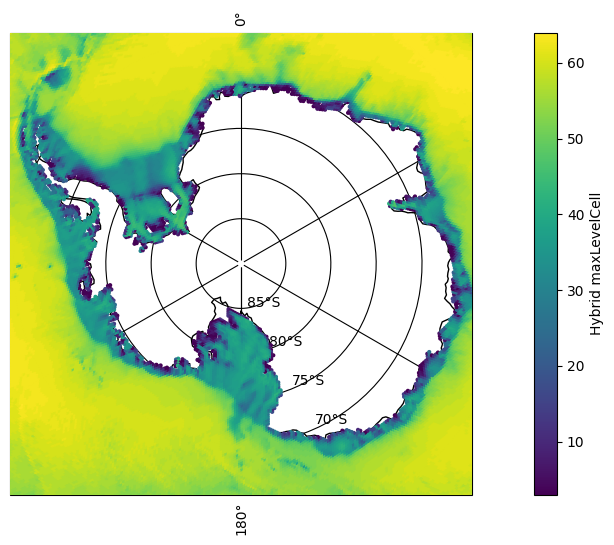

In [11]:
crs_lonlat = cartopy.crs.PlateCarree()
crs_3031 = cartopy.crs.Stereographic(central_latitude=-90, true_scale_latitude=-71)

fig, ax = plt.subplots(figsize=(8,6), facecolor='white', subplot_kw=dict(projection=crs_3031)) # Create our plot

ax.coastlines(resolution='110m', color='k') # Add coastlines
gl = ax.gridlines(draw_labels=True, color='k') # Add gridlines to make latitudes/longitudes
gl.ylabel_style = {'color': 'k'} # The latitudes are shown inside the plot, so they need to be white for visibility

n = 50 # Downsampling factor
# X_bm, Y_bm = np.meshgrid(nc_bedmachine.variables['x'][::n], nc_bedmachine.variables['y'][::n])
# h = np.array(nc_bedmachine.variables['thickness'])[::n,::n]

# pcm = ax.pcolormesh(X_bm, Y_bm, h) # Plot thickness data
# reshaped_z = np.reshape(initial_state_master.maxLevelCell, (len(initial_state_master.lonCell), len(initial_state_master.latCell)))
# reshaped_z = [initial_state_master.maxLevelCell for i in range(len(initial_state_master.lonCell))]
pcm = ax.scatter(initial_state_hybrid.lonCell*(180./np.pi), initial_state_hybrid.latCell*(180./np.pi), c=initial_state_hybrid.maxLevelCell, transform=crs_lonlat, s = 4,zorder=10) # Plot thickness data
# pcm = ax.pcolormesh(initial_state_master.lonCell*(180./np.pi), initial_state_master.latCell*(180./np.pi), reshaped_z, transform=crs_lonlat) # Plot thickness data

clb = fig.colorbar(pcm, ax=ax, pad=0.1) # Add a colorbar
clb.set_label('Hybrid maxLevelCell')

ax.set_aspect('equal')
ax.set_xlim(-2.8e6,2.8e6) # Quick note here: If you use set_(x/y)lim, you're setting the limits in projected coordinates.
ax.set_ylim(-2.8e6,2.8e6) #                  If you prefer, you can use ax.set_extent to set the limits in any coordinate system you want.
# ax.set_xlim(0,360)
# ax.set_ylim(0,-90)
#plt.savefig('bedmachinethickness.png')

plt.show()